# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
# Set style
sns.set_theme(style="whitegrid")

# **2. Load the Dataset**

In [2]:
df = pd.read_csv('accelerometer.csv')
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


# **3. Check for Missing Values and Dataset Info**

In [3]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Info:\n")
df.info()


Missing Values:
 wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


# **4. Visualize the Distribution of Target Classes**

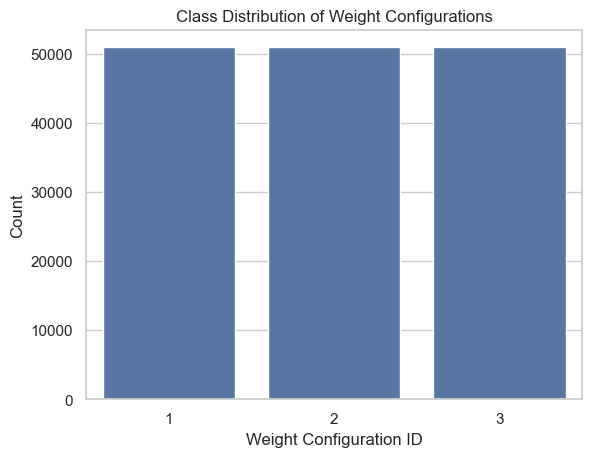

In [4]:
sns.countplot(x='wconfid', data=df)
plt.title('Class Distribution of Weight Configurations')
plt.xlabel('Weight Configuration ID')
plt.ylabel('Count')
plt.show()

# **5. Pairplot of Accelerometer Data (Sampled)**

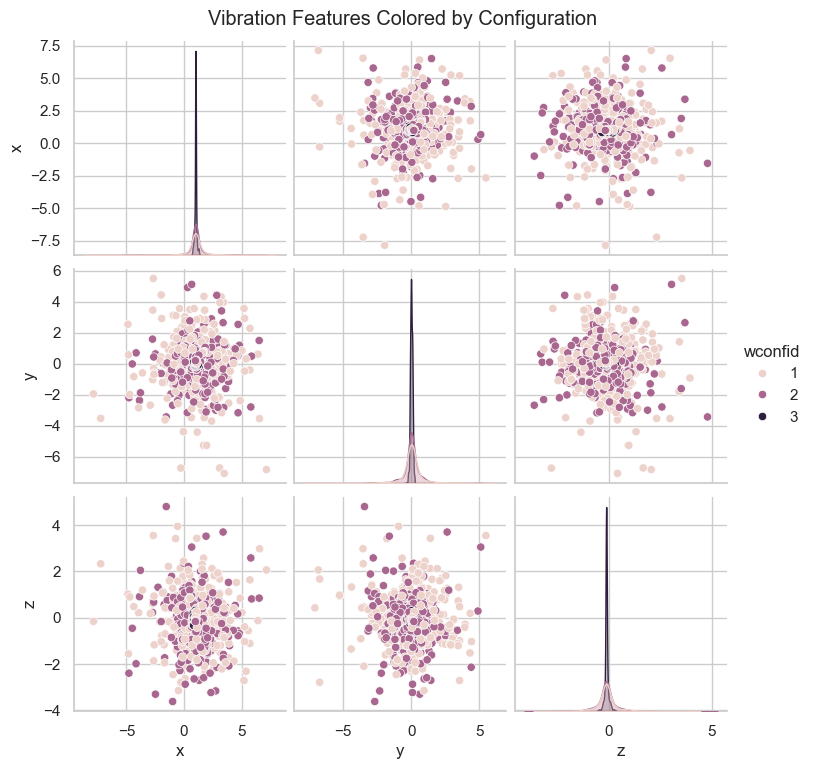

In [5]:
sample_df = df.sample(3000, random_state=42)
sns.pairplot(sample_df, hue='wconfid', vars=['x', 'y', 'z'])
plt.suptitle("Vibration Features Colored by Configuration", y=1.02)
plt.show()

# **6. Correlation Heatmap**

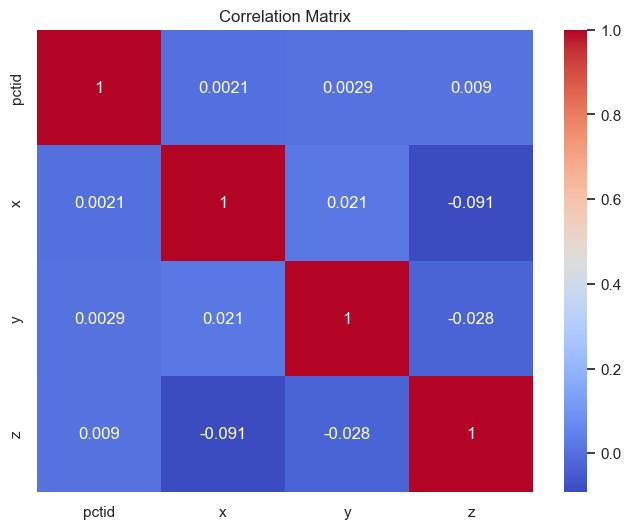

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['pctid', 'x', 'y', 'z']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **7. Feature Scaling and Train-Test Split**

In [7]:
X = df[['pctid', 'x', 'y', 'z']]
y = df['wconfid']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# **8. Train Random Forest Model**

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, max_features= 1, max_depth=20)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("--- RandomForestClassifier Classification Report ---")
print(classification_report(y_test, rf_preds, zero_division=1))

--- RandomForestClassifier Classification Report ---
              precision    recall  f1-score   support

           1       0.70      0.63      0.66     10200
           2       0.66      0.69      0.68     10200
           3       0.84      0.88      0.86     10200

    accuracy                           0.73     30600
   macro avg       0.73      0.73      0.73     30600
weighted avg       0.73      0.73      0.73     30600



# **8.5. Random Forest Feature Importance**

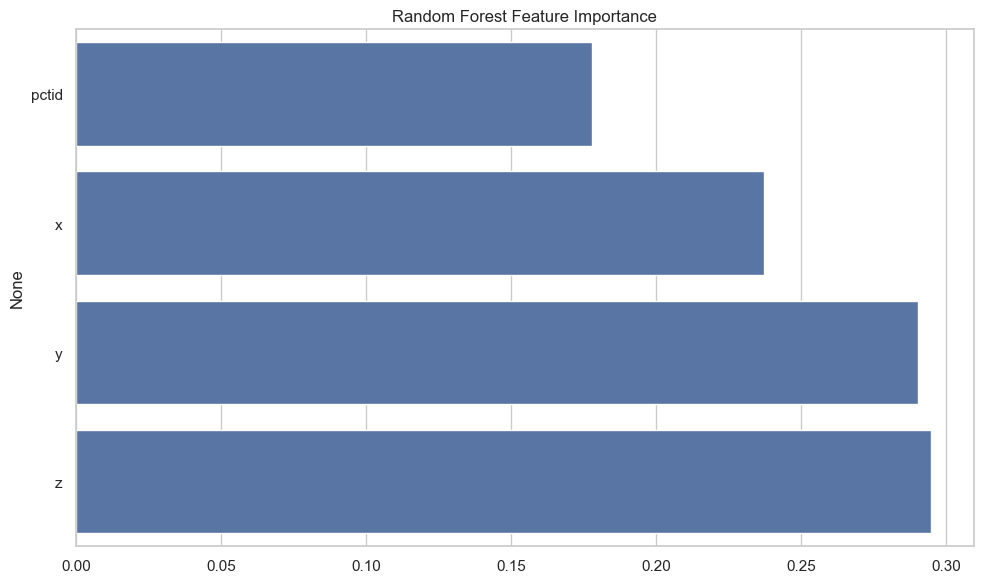

In [9]:
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
sns.barplot(x=importances[indices], y=features[indices])
plt.tight_layout()
plt.show()

# **9. Train XGBoost Model**

In [10]:
# Adjust the target variable to start from 0
y = y - y.min()

# Re-split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train the XGBoost model again
xgb = XGBClassifier(eval_metric='logloss', max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Print the classification report
print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb, zero_division=1))

xgb = XGBClassifier(eval_metric='logloss', max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb, zero_division=1))


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.69      0.63      0.66     10200
           1       0.66      0.69      0.67     10200
           2       0.83      0.88      0.86     10200

    accuracy                           0.73     30600
   macro avg       0.73      0.73      0.73     30600
weighted avg       0.73      0.73      0.73     30600


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.69      0.63      0.66     10200
           1       0.66      0.69      0.67     10200
           2       0.83      0.88      0.86     10200

    accuracy                           0.73     30600
   macro avg       0.73      0.73      0.73     30600
weighted avg       0.73      0.73      0.73     30600



# **10. Confusion Matrices**

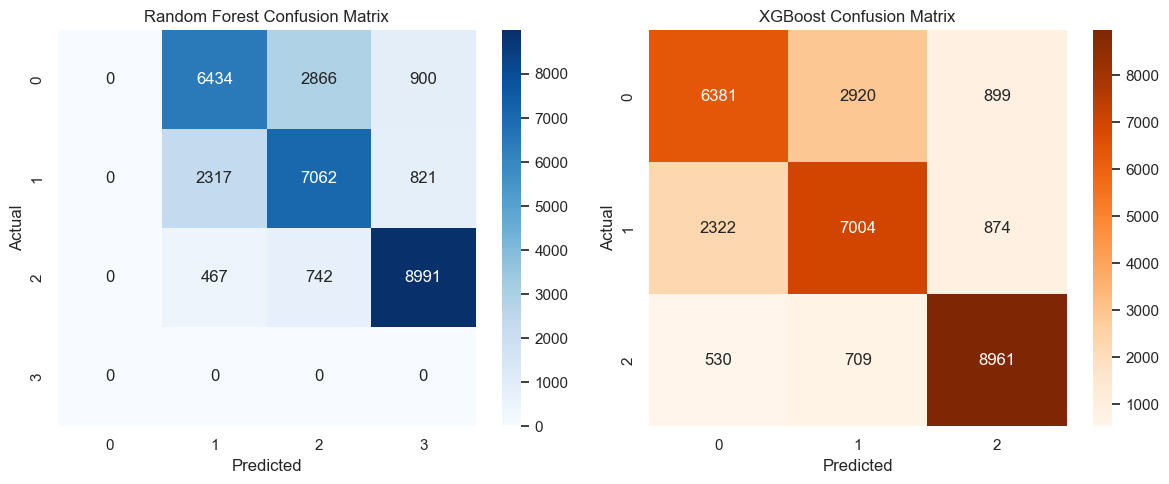

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Oranges')
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# **11. Hyperparameter Tuning (Random Forest)**


In [12]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
gs.fit(X_train, y_train)

print("\nBest Parameters from GridSearch:\n", gs.best_params_)


Best Parameters from GridSearch:
 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


# **12. Evaluate Best RF Model**

In [13]:
best_rf = gs.best_estimator_
best_rf_preds = best_rf.predict(X_test)

print("\nBest Random Forest Accuracy:", accuracy_score(y_test, best_rf_preds))
print("\nClassification Report (Best RF):\n")
print(classification_report(y_test, best_rf_preds))


Best Random Forest Accuracy: 0.7370588235294118

Classification Report (Best RF):

              precision    recall  f1-score   support

           0       0.70      0.64      0.67     10200
           1       0.66      0.69      0.68     10200
           2       0.84      0.88      0.86     10200

    accuracy                           0.74     30600
   macro avg       0.74      0.74      0.74     30600
weighted avg       0.74      0.74      0.74     30600



# **13. Hyperparameter Tuning (XGBoost)**

In [14]:
# **13. Hyperparameter Tuning (XGBoost)**
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3 ,6, 9, 12, 15, 18, 20],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_xgb = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)
grid_xgb.fit(X_train, y_train)

print("\\nBest Parameters from XGBoost GridSearch:")
print(grid_xgb.best_params_)


\nBest Parameters from XGBoost GridSearch:
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


# **14. Evaluate Best XGB Model**

In [15]:
best_xgb = grid_xgb.best_estimator_
best_xgb_preds = best_xgb.predict(X_test)

print("Best XGBoost Accuracy:", accuracy_score(y_test, best_xgb_preds))
print("Classification Report (Best XGBoost):")
print(classification_report(y_test, best_xgb_preds))

Best XGBoost Accuracy: 0.7353921568627451
Classification Report (Best XGBoost):
              precision    recall  f1-score   support

           0       0.69      0.63      0.66     10200
           1       0.66      0.69      0.68     10200
           2       0.84      0.88      0.86     10200

    accuracy                           0.74     30600
   macro avg       0.73      0.74      0.73     30600
weighted avg       0.73      0.74      0.73     30600



# **15. Macro-Averaged F1 Score Comparison**

In [16]:
f1_macro_rf = f1_score(y_test, rf_preds, average='macro')
f1_macro_best_rf = f1_score(y_test, best_rf_preds, average='macro')
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_macro_best_xgb = f1_score(y_test, best_xgb_preds, average='macro')

# Print results
print("\nMacro F1 Score - Random Forest:", round(f1_macro_rf, 4))
print("Macro F1 Score - Best Random Forest (Tuned):", round(f1_macro_best_rf, 4))
print("Macro F1 Score - XGBoost:", round(f1_macro_xgb, 4))
print("Macro F1 Score - Best XGBoost (Tuned):", round(f1_macro_best_xgb, 4))


Macro F1 Score - Random Forest: 0.0774
Macro F1 Score - Best Random Forest (Tuned): 0.7356
Macro F1 Score - XGBoost: 0.7284
Macro F1 Score - Best XGBoost (Tuned): 0.7339


# **16. Final Confusion Matrix for Best RF and XGB**

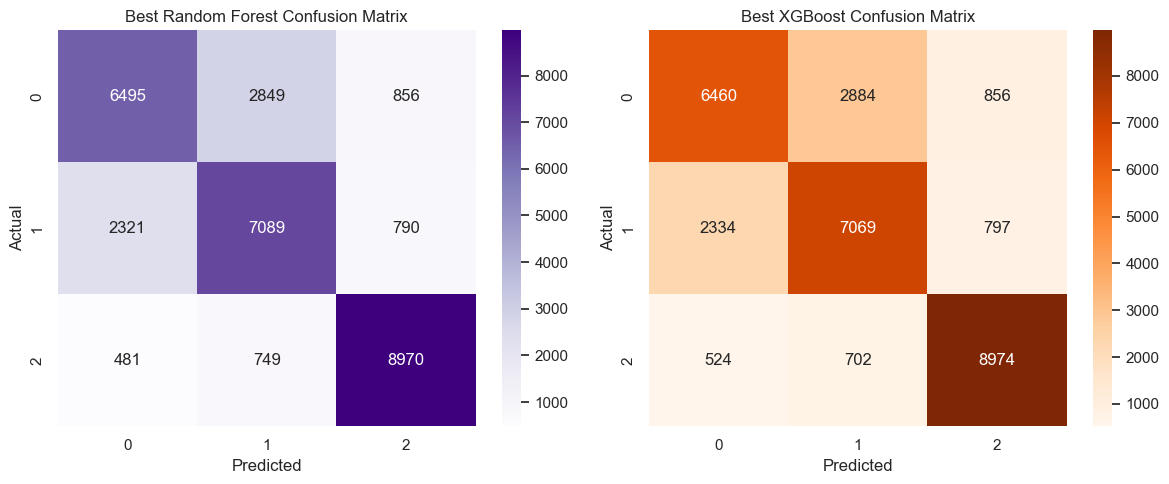

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Best Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, best_rf_preds), annot=True, fmt='d', ax=axes[0], cmap='Purples')
axes[0].set_title('Best Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Best XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test, best_xgb_preds), annot=True, fmt='d', ax=axes[1], cmap='Oranges')
axes[1].set_title('Best XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# **16. Mean Absolute Error Comparison (Random Forest)**


In [18]:
# Calculate MAE
mae_rf = mean_absolute_error(y_test, rf_preds)
mae_best_rf = mean_absolute_error(y_test, best_rf_preds)

# Print the results
print("\nMean Absolute Error - Random Forest (Default):", round(mae_rf, 4))
print("Mean Absolute Error - Best Random Forest (Tuned):", round(mae_best_rf, 4))


Mean Absolute Error - Random Forest (Default): 1.0793
Mean Absolute Error - Best Random Forest (Tuned): 0.3066
